<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/3_First_order_methods/3_4_Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3: First order methods

# The Geometry of First-Order Taylor Series

In the previous Section on general lines and hyperplanes we described how the slope(s) of a line / hyperplane describes its *direction of steepest (or greatest) ascent* and (its negative) the *direction of steepest descent*.  These are the directions one must travel (in the input space) to increase / decrease the value of the line/hyperplane as quickly as possible.  Here we carry over the formulate from the previous Section, studying its impact on the scenario of the first order Taylor Series approximation (where our hyperplane is defined by a functions derivative(s)).  This geometric anatomy define the very essence of the gradient descent algorithm.

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone library subdirectory
    if not Path('chapter_3_library').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/3_First_order_methods/chapter_3_library
    else:
        print('chapter_3_library already cloned!')

    # clone videos
    if not Path('chapter_3_videos').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/3_First_order_methods/chapter_3_videos
    else:
        print('chapter_3_videos already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_3_library')
sys.path.append('./chapter_3_videos') 

# import section helper
import section_3_4_helpers

# video paths
video_path_1 = 'chapter_3_videos/animation_4.mp4'
video_path_2 = 'chapter_3_videos/animation_5.mp4'

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
from base64 import b64encode

def show_video(video_path, width = 1000):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={width} controls><source src="{video_url}"></video>""")

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Single-input function derivatives and the direction of steepest ascent / descent

The derivative of a single-input function defines a tangent line at each point its input domain - this is called its *first order Taylor series approximation* (see Chapter 3 for complete details).  For a generic differentiable function $g(w)$ we can define this tangent line at each point $w^0$ as 

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0)
\end{equation}

In the context of the previous Section this *linear* approximation also has an easily computable direction of steepest ascent and descent - i.e., the direction we travel in that increases / decreases the line in the fastest way possible.  The *steepest ascent* direction - according to the previous Section - is given explicitly by the slope of this line, which is the derivative itself

\begin{equation}
\text{steepest ascent direction of tangent line} = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0).
\end{equation}

Likewise, the *steepest descent direction* is given by the negative slope of this line - which is the *negative* derivative

\begin{equation}
\text{steepest descent direction of tangent line} = -\frac{\mathrm{d}}{\mathrm{d}w}g(w^0).
\end{equation}

Now keep in mind the context we are in here: this particular (tangent) line is built to explicitly to closely *approximate* its underlying function near $w^0$.  Because of of this its steepest ascent and descent directions tell us not just the directions we should travel in in order to increase / decrease *its* value locally, but the direction we should travel in (at least locally around $w^0$ the input point defining the tangent line) in order to increase / decrease the value of the *underlying function itself*.  In the next Subsection we will see that this same idea holds for multi-input functions as well.

Lets explore this idea through a few examples.

#### <span style="color:#a50e3e;">Example 1. </span>  The derivative as a direction of ascent / descent for a single-input quadratic

Below we visualize the ascent and descent directions, derived from the first order Taylor series approximation, over a fine set of points for the single-input quadratic $g(w) =  0.5w^2 + 1$.  The derivative / steepest ascent direction is plotted as a vector in black along the horizontal axis, while the negative derivative / steepest descent direction is similarly shown in red.  The slider mechanism below the plot allows you to adjust the point $w^0$ at which the approximation is being made.

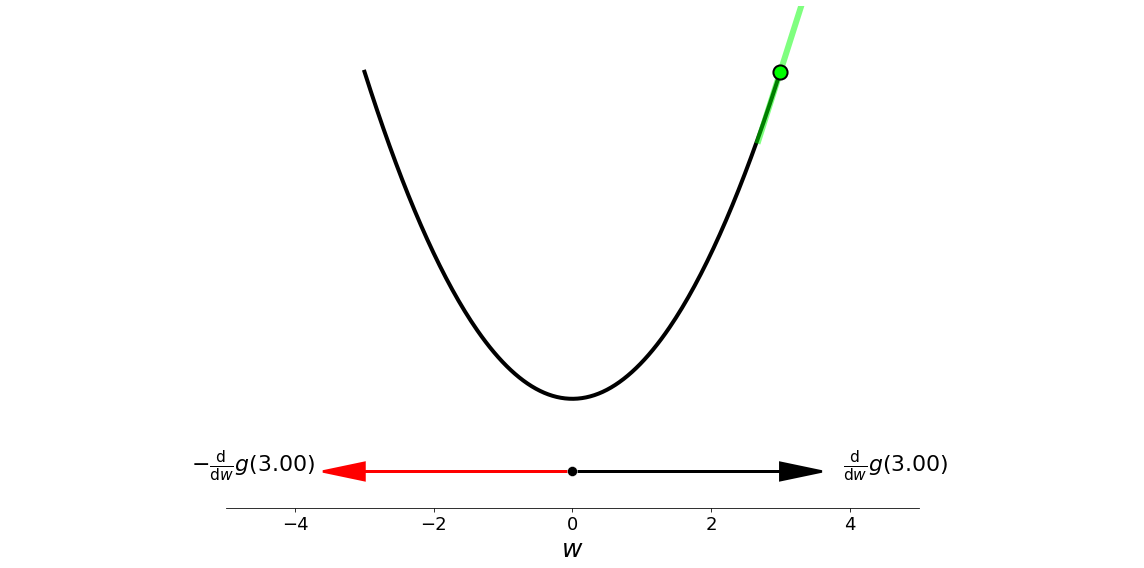

In [2]:
# what function should we play with?  Defined in the next line.
g = lambda w: 0.5*w**2 + 1

# run the visualizer for our chosen input function
section_3_4_helpers.animate_visualize2d(savepath=video_path_1,g=g,num_frames = 100,plot_descent = True,fps=10)

In [3]:
show_video(video_path_1, width=800)

Moving the slider back and forth across the input region, we can see the steepest ascent direction provided by the first order approximation always provides a direction of travel that not only *increases* the value of the line, but of the underlying function as well.  Likewise, the *steepest descent direction* of the tangent line always provides a direction in which the function itself *decreases*.

Of course a quadratic is a fairly simple creature, but nonetheless this idea holds universally for any function.

#### <span style="color:#a50e3e;">Example 2. </span>  The derivative as a direction of ascent / descent for a single-input wavy function

Below produce the same sort of animation as shown in the previous example only for the function 

\begin{equation}
g(w) = \text{sin}(3w) + 0.1w^2 + 1.5.
\end{equation}

The changing in the ascent / descent direction of each tangent line here is more interesting in this case due to the curvy nature of the function, but nonetheless you can see that at each point these directions provide ascent/descent in the function locally as well.  In other words, if we were to follow the downward direction on any of the first order approximations drawn here it always leads us to smaller values of on the function itself.  Likewise for ascent direction.

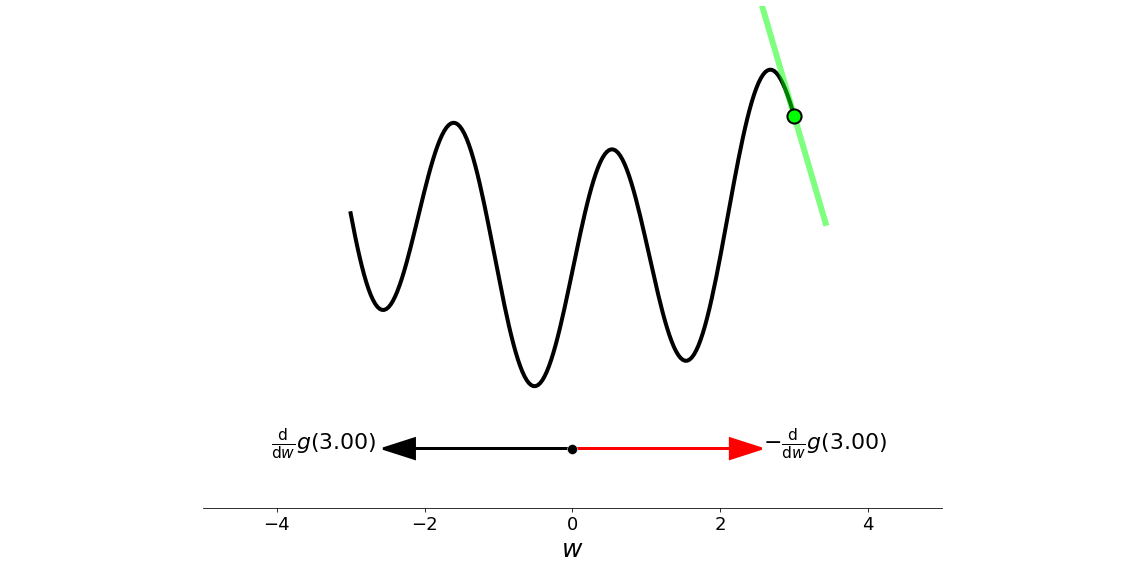

In [4]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(3*w) + 0.1*w**2 + 1.5

# run the visualizer for our chosen input function
section_3_4_helpers.animate_visualize2d(savepath=video_path_2,g=g,num_frames = 200,plot_descent = True,fps=10)

In [7]:
show_video(video_path_2, width=800)

##  Multi-input function derivatives and the direction of greatest ascent / descent

The same idea we have just explored for differentiable single-input functions holds for multi-input functions as well.  Now with an $N$ dimensional input function $g\left(\mathbf{w}\right)$ instead of one derivative we have $N$ *partial* derivatives, one in each input direction, stacked into a vector called the *gradient*

\begin{equation}
\nabla g\left(\mathbf{w}\right) = 
\begin{bmatrix}
\
\frac{\partial}{\partial w_1}g\left(\mathbf{w}\right) \\
\frac{\partial}{\partial w_2}g\left(\mathbf{w}\right) \\
\vdots \\
\frac{\partial}{\partial w_N}g\left(\mathbf{w}\right).
\end{bmatrix}
\end{equation}

Likewise the first order Taylor series is now a tangent *hyperplane*, which at a point $\mathbf{w}^0$ has the (analogous to the single input case) formula

\begin{equation}
h(\mathbf{w}) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0).
\end{equation}

For a complete description of this set of idesa see Chapter 3.

In complete analogy to the single-input case, this *linear* approximation also has an easily computable directions of steepest ascent and descent.  Each *partial derivative* along a single input provides us with the steepest descent direction along its respective coordinate axis.  

\begin{equation}
\text{steepest ascent direction along $n^{th}$ axis} = \frac{\partial}{\partial w_n} g(\mathbf{w}^0).
\end{equation}

Likewise the direction provided by each negative partial derivative provides us with a steepest descent direction along its respective input axis. 

\begin{equation}
\text{steepest descent direction along $n^{th}$ axis} = - \frac{\partial}{\partial w_n} g(\mathbf{w}^0).
\end{equation}

The steepest ascent direction itself - with respect to the entire $N$ dimensional input space -  is then given by the entire gradient

\begin{equation}
\text{ascent direction of tangent hyperplane} = \nabla g(\mathbf{w}^0).
\end{equation}

Likewise, the *descent direction* is given by the negative vector of slopes of this tangent hyperplane - which is the *negative* gradient

\begin{equation}
\text{descent direction of tangent hyperplane} = -\nabla g(\mathbf{w}^0)
\end{equation}

This holds true regardless of the function we are examining - so long as it is differentiable.  Thus we can say in general - since the gradient is the natural generalization of the derivative of a single-input function to the multi-input case - that the gradient always defines an ascent / descent direction of a general function.

> The steepest ascent / descent direction of the first order Taylor series approximation tells us the direction we must travel in (at least locally around where it most closely resembles its underlying function) in order to increase / decrease both the linear approximation and underlying function.  These directions are defined explicitly by the gradient of the function.